This notebook will install OpenMC in colab and link to a shared nuclide library.  If you have not done so yet, please email me which account you would like the data to be shared with.

In [2]:
#Add google drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

Once you have mounted your drive folder to colab, we will now create an environment variable that OpenMC looks for.

In [3]:
#Add link to shared cross section library
#shared library was added as a shortcut to My Drive from the web interface
%env OPENMC_CROSS_SECTIONS = /gdrive/My Drive/endfb71_hdf5/cross_sections.xml

env: OPENMC_CROSS_SECTIONS=/gdrive/My Drive/endfb71_hdf5/cross_sections.xml


The easiest way to install OpenMC is through conda, which is not available by default in colab.  So first we install conda.

In [4]:
#Download miniconda and install
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

zsh:1: command not found: wget
chmod: Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
bash: ./Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory


Once conda is installed, we can now install OpenMC.

In [4]:
# Install OpenMC
!conda config --add channels conda-forge
!conda install openmc -y

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmc


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    cached-property-1.5.1      |             py_0          10 KB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_1         143 KB  conda-forge
    conda-4.9.2                |   py37h89c186

These steps need to be repeated each time you open a new notebook or start a new session.  If you want to avoid doing this everytime and have some familiarity with Linux, feel free to install a local version of OpenMC.  Documentation and installation details can be found here https://docs.openmc.org/en/latest/ and data libraries here https://openmc.org/

In [5]:
import openmc

In [7]:
%matplotlib inline
from pprint import pprint

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.patches import Rectangle

This script only uses the data class of OpenMC which allows us to navigate the nuclear database.  The following line will read the U235 file.  This is the step that will let you know if the library was linked properly!

In [9]:
u235_ace = openmc.data.IncidentNeutron.from_hdf5('/gdrive/My Drive/endfb71_hdf5/U235.h5')

This block reads in the fission xs (MT=18), for other MT values consult https://t2.lanl.gov/nis/endf/mts.html

The energy grid is read in the "energies" variable.  Each nuclide and each temperature has a unique energy grid.

Text(0, 0.5, 'Cross section (b)')

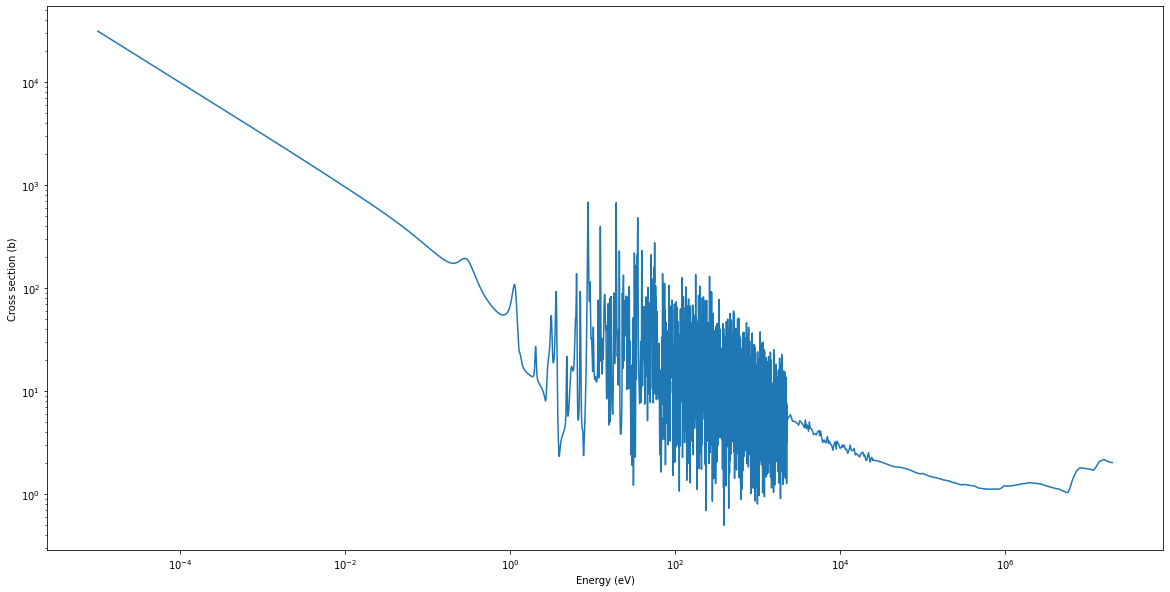

In [19]:
fission = u235_ace[18] #18 is fission
energies = u235_ace.energy['294K']
fiss_xs = fission.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.loglog(energies, fiss_xs)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')

The block below illustrates how you can access the fission xs value at a single energy point.  In this case, we are reading the value at 0.025 eV for a temperature of 294K.  If the energy value does not exist in the grid, the openmc.data class will interpolate linearly between the two nearest point.  It will however not interpolate in temperature.  Also note, that all energy values are by default in eV.

In [23]:
fission.xs['294K'](0.025)

588.7864396226415

In [24]:
u235_ace.atomic_number

92

In [25]:
u235_ace.atomic_weight_ratio

233.0248

We can also look up the Q-value of the fission reaction, also given in eV.

In [26]:
fission.q_value

193405400.0

Fission also has derived_products and the following blocks show the neutron yield and plots it as a function of energy.

In [27]:
derived = fission.derived_products[0]

In [28]:
derived.particle

'neutron'

In [29]:
derived.yield_(1.0) #in eV

2.4367

Text(0, 0.5, 'Yield (neutrons)')

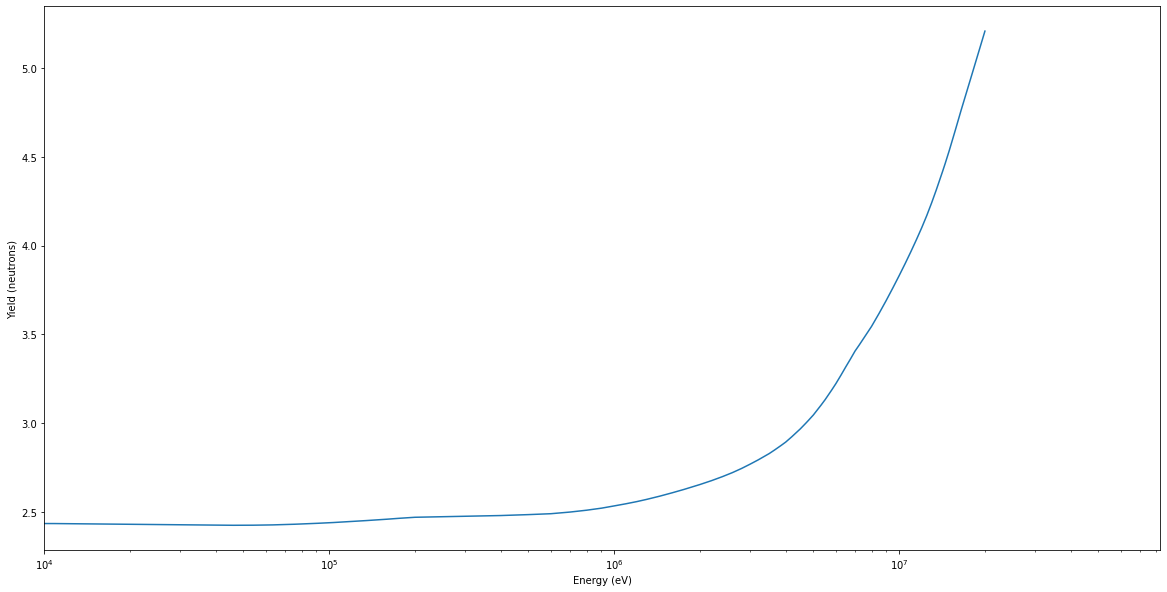

In [30]:
energies = u235_ace.energy['294K']
fiss_xs = fission.xs['294K'](energies)
plt.figure(figsize=(20,10))
plt.semilogx(energies, derived.yield_(energies))
plt.xlabel('Energy (eV)')
plt.xlim(xmin=1e4)
plt.ylabel('Yield (neutrons)')